#### XYZ Company has offices in four different zones. The company wishes to investigate the following :
#### ● The mean sales generated by each zone.
#### ● Total sales generated by all the zones for each month.
#### ● Check whether all the zones generate the same amount of sales.
#### Help the company to carry out their study with the help of data provided.


In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [2]:
#reading csv file
df=pd.read_csv(r"C:\Users\rakhi\Downloads\Sales_data_zone_wise.csv")
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
#checking null values
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [5]:
#coloumn names
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

<AxesSubplot:title={'center':'Summary statistics of each zone'}>

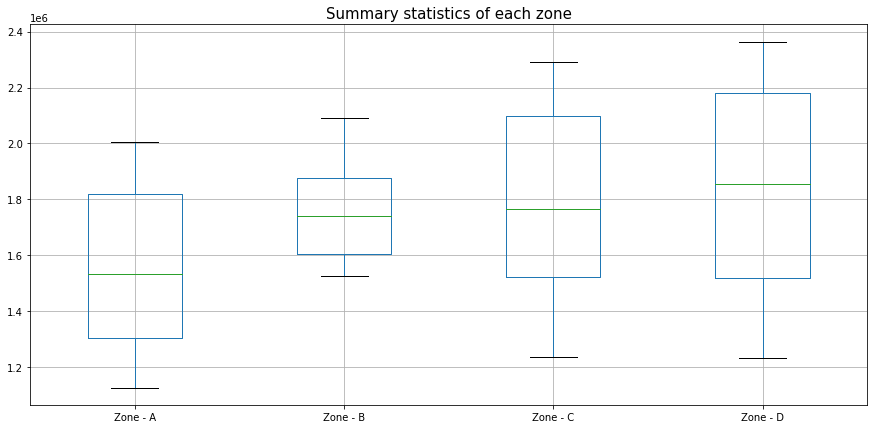

In [6]:
plt.figure(figsize=(15,7))
plt.title("Summary statistics of each zone",fontsize=15)
df.boxplot()

Inference

Zone A has the least sale and Zone D has the maximum sale recorded.

Zone B has less variability in its range

#### The mean sales generated by each zone

In [7]:
zone=("Zone - A","Zone - B","Zone - C","Zone - D")
for i in zone:
    print("The mean sales generated by",i,"is",df[i].mean())

The mean sales generated by Zone - A is 1540493.1379310344
The mean sales generated by Zone - B is 1755559.5862068965
The mean sales generated by Zone - C is 1772871.0344827587
The mean sales generated by Zone - D is 1842926.7586206896


<AxesSubplot:>

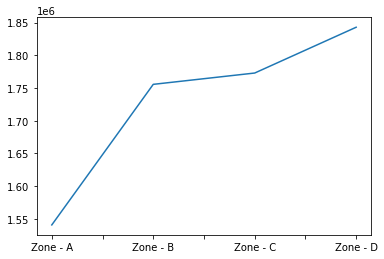

In [8]:
df.mean().plot()

Inference:

1. Mean sales generated by Zone D is the highest followed by Zone B and Zone C respectively.

2. Mean sales generated by Zone A is the least.

#### Total sales generated by all the zones for each month.

In [9]:
#adding the coloumn of total sales generated by all the zones for each month
df1=df.copy()
df1["Total_sales"]=df.sum(axis=1)
df1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total sales of each month'}, xlabel='Month', ylabel='Total_sales'>

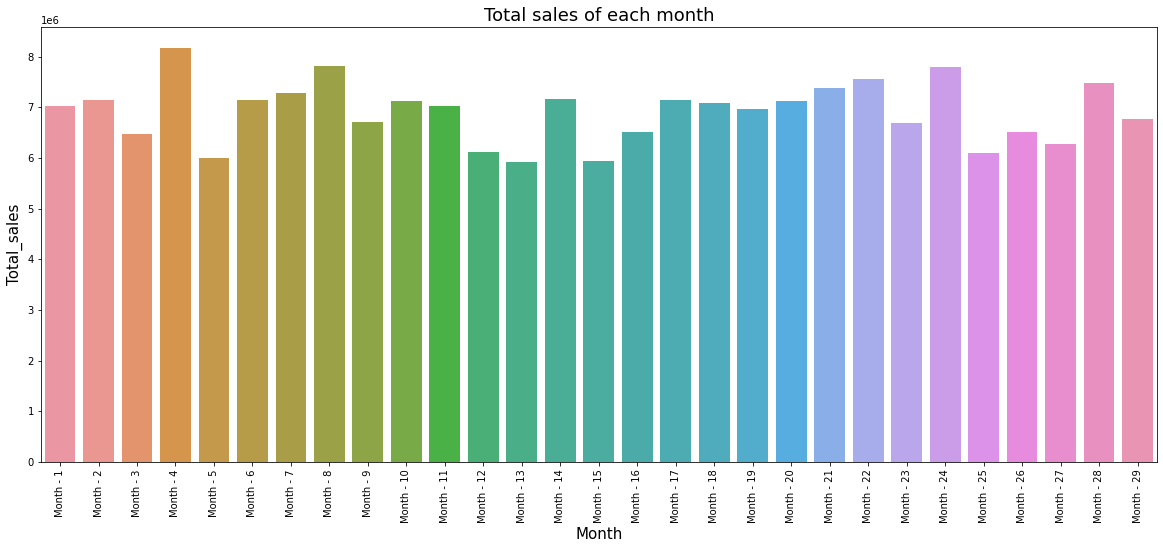

In [10]:
plt.figure(figsize=(20,8))
plt.title("Total sales of each month",fontsize=18)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)
plt.xticks(rotation = 90)
sns.barplot(df1["Month"],df1["Total_sales"])

Month 4 has the highest sale.

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Total Sales of each month')

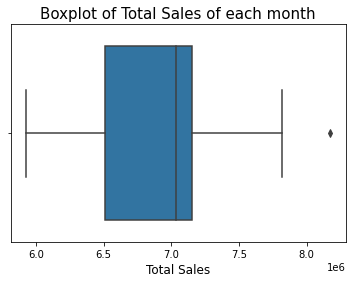

In [11]:
p=sns.boxplot(df1["Total_sales"])
p.set_xlabel("Total Sales", fontsize = 12)
p.set_title("Boxplot of Total Sales of each month",fontsize = 15)

This is  negatively skewed.

#### Check whether all the zones generate the same amount of sales.

Here, hypothesis are:

Ho: All the zones generate the same amount of sales.

H1: All the zones generate different amount of sales.

Since we want to test if there is a significant difference between mean of the three independent groups, we use ANOVA test.

In [12]:
F_value,p_val = stats.f_oneway(df["Zone - A"],df["Zone - B"],df["Zone - C"],df["Zone - D"])
print("F value =",F_value,"\np value=",p_val)
alpha = 0.05
if p_val >= alpha:
    print("We fail to reject Ho based on the sample.\nAll the zones generate the same amount of sales.")
else:
    print("We reject Ho based on the sample.\nAll the zones generate different amount of sales.")

F value = 5.672056106843581 
p value= 0.0011827601694503335
We reject Ho based on the sample.
All the zones generate different amount of sales.
